ФБ-22 Копилов Сергій
Лабораторна робота №5

Завдання 1

In [9]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.signal import iirfilter, filtfilt
import plotly.graph_objs as go
from ipywidgets import FloatSlider, Checkbox, Button, HBox, VBox

In [10]:
def harmonic_with_noise(t, amplitude, frequency, noise_covariance, phase=0, show_noise=True, cutoff_freq=0.1):
    global noise, last_noise_covariance, signal, noisy_signal, filtered_signal
    
    if noise_covariance != last_noise_covariance: #for not gen noise every time
        noise = np.random.normal(0, np.sqrt(noise_covariance), len(t))
        last_noise_covariance = noise_covariance
    
    signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    noisy_signal = signal + noise
    
    b, a = iirfilter(4, cutoff_freq, btype='lowpass', analog=False, ftype='butter')
    filtered_signal = filtfilt(b, a, noisy_signal)

    if show_noise != True:
        noisy_signal = signal

    return signal, noisy_signal, filtered_signal

def update_plot(sth=None):
    global t
    amplitude = amplitude_slider.value
    frequency = frequency_slider.value
    noise_covariance = noise_covariance_slider.value
    phase = phase_slider.value
    cutoff_freq = cutoff_freq_slider.value
    show_noise = show_noise_checkbox.value
    
    signal, noisy_signal, filtered_signal = harmonic_with_noise(t, amplitude, frequency, noise_covariance, phase, show_noise, cutoff_freq)
    
    line_signal.set_ydata(signal)
    line_noisy_signal.set_ydata(noisy_signal)
    line_filtered_signal.set_ydata(filtered_signal)
    
    ax1.relim()
    ax1.autoscale_view()
    ax2.relim()
    ax2.autoscale_view()
    fig.canvas.draw()

def reset_values(sth=None):
    global amplitude_slider, frequency_slider, noise_covariance_slider, cutoff_freq_slider, show_noise_checkbox, def_val, phase_slider
    amplitude_slider.value = def_val['amplitude']
    frequency_slider.value = def_val['frequency']
    noise_covariance_slider.value = def_val['noise_covariance']
    cutoff_freq_slider.value = def_val['cutoff_freq']
    phase_slider.value = def_val['phase']
    show_noise_checkbox.value = def_val['show_noise']
    
    update_plot()

def create_plot():
    global t
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    line_noisy_signal, = ax1.plot(t, noisy_signal, label='Noisy Signal', color='yellow')
    line_signal, = ax1.plot(t, signal, label='Signal', color='blue')
    line_filtered_signal, = ax2.plot(t, filtered_signal, label='Filtered Signal', color='blue')

    ax1.legend()
    ax1.set_title('signal')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('amplitude')
    ax1.grid(True)

    ax2.legend()
    ax2.set_xlabel('Time')
    ax2.set_ylabel('amplitude')
    ax2.set_title('filtered signal')
    ax2.grid(True)

    return fig, (ax1, ax2), line_signal, line_noisy_signal, line_filtered_signal

In [11]:
t = np.linspace(0, 1, 1000)

last_noise_covariance = 0.1
noise = np.random.normal(0, np.sqrt(last_noise_covariance), len(t))

def_val = {'amplitude': 1.0, 'frequency': 1.0, 'noise_covariance': 0.1, 'phase': 0, 'show_noise': True, 'cutoff_freq': 0.1}

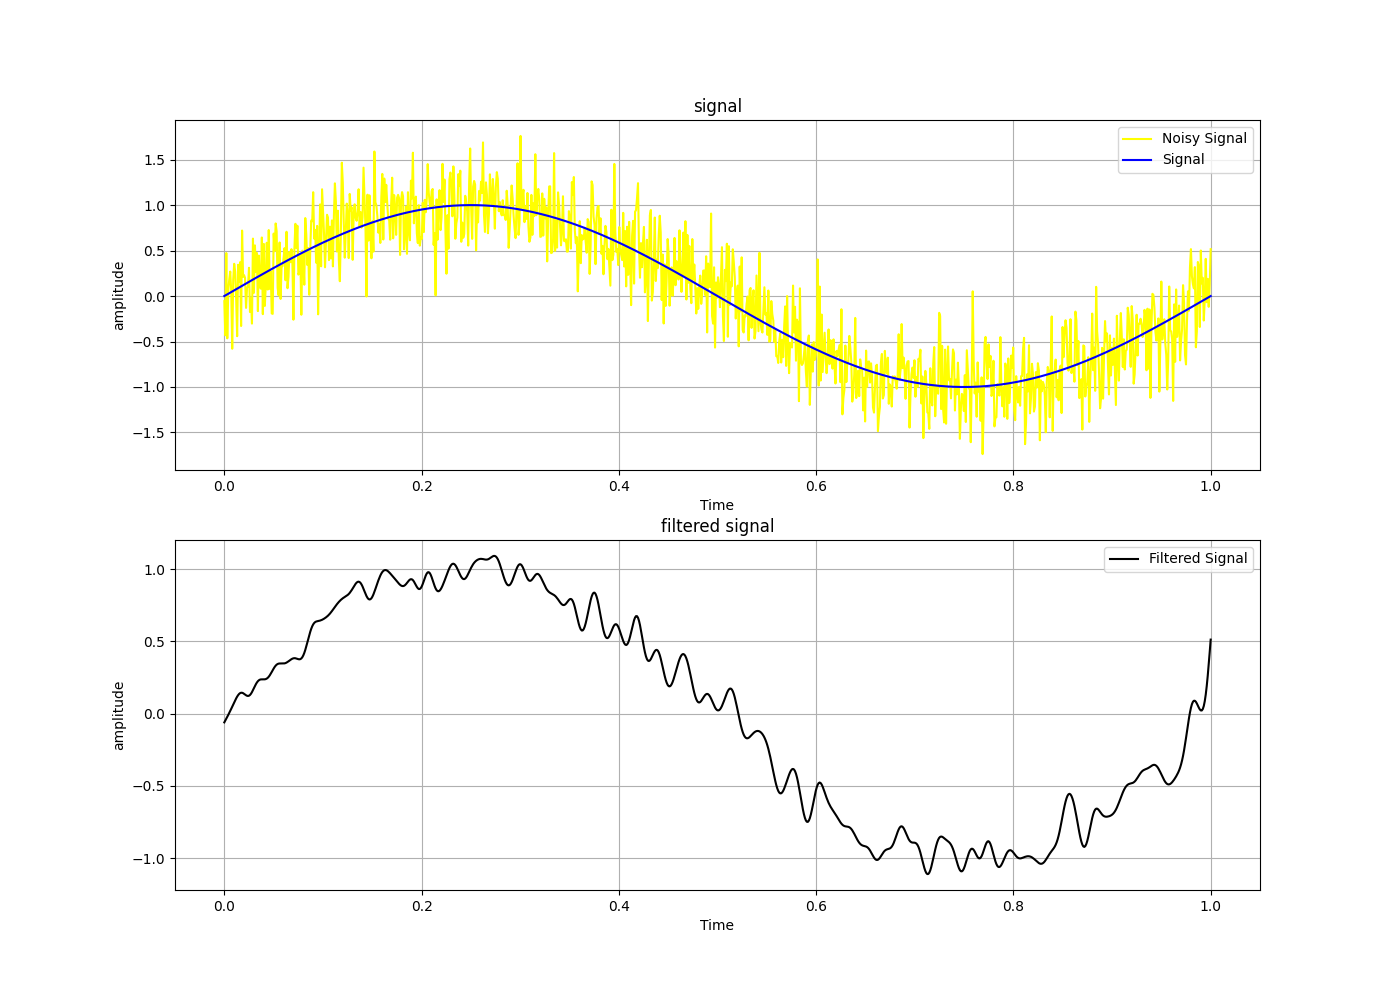

In [12]:
# Create sliders
amplitude_slider = widgets.FloatSlider(value=def_val['amplitude'], min=0.1, max=5.0, step=0.1, description='Amplitude:')
frequency_slider = widgets.FloatSlider(value=def_val['frequency'], min=0.1, max=5.0, step=0.1, description='Frequency:')
noise_covariance_slider = widgets.FloatSlider(value=def_val['noise_covariance'], min=0.01, max=1.0, step=0.01, description='Noise Covariance:')
cutoff_freq_slider = widgets.FloatSlider(value=def_val['cutoff_freq'], min=0.01, max=0.5, step=0.01, description='Cutoff Frequency:')
phase_slider = widgets.FloatSlider(value=def_val['phase'], min=0, max=10, step=1, description='Phase:')
show_noise_checkbox = widgets.Checkbox(value=def_val['show_noise'], description='show noise')
reset_button = widgets.Button(description='Reset', tooltip='Reset to initial values', button_style='info')

signal, noisy_signal, filtered_signal = harmonic_with_noise(t, **def_val)


# Connect sliders to update function
amplitude_slider.observe(update_plot, 'value')
frequency_slider.observe(update_plot, 'value')
noise_covariance_slider.observe(update_plot, 'value')
phase_slider.observe(update_plot, 'value')
cutoff_freq_slider.observe(update_plot, 'value')
show_noise_checkbox.observe(update_plot, 'value')

# Connect reset button to reset function
reset_button.on_click(reset_values)
reset_button.style.button_color = 'orange'
reset_button.layout.margin_left = '20px'

# Create the plot
fig, (ax1, ax2), line_signal, line_noisy_signal, line_filtered_signal = create_plot()
# Display the widgets
display(widgets.VBox([widgets.HBox([amplitude_slider, frequency_slider, noise_covariance_slider, show_noise_checkbox]), widgets.HBox([cutoff_freq_slider, phase_slider, reset_button])]))

Завдання 2

In [13]:
t = np.linspace(0, 1, 1000)
noise = np.random.normal(0, np.sqrt(0.1), len(t))
last_noise_covariance = 0.1
initial_values = {'amplitude': 1.0, 'frequency': 1.0, 'noise_covariance': 0.1, 'phase': 0, 'show_noise': True}

signal, noisy_signal, filtered_signal = harmonic_with_noise(t, **initial_values)

In [14]:
def custom_lowpass_filter(signal, cutoff_freq, fs=1000):
    freq_signal = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(signal), 1/fs)
    
    cutoff = cutoff_freq * fs
    filter_mask = np.abs(frequencies) <= cutoff
    
    filtered_freq_signal = freq_signal * filter_mask
    
    filtered_signal = np.fft.ifft(filtered_freq_signal).real
    
    return filtered_signal

def moving_avg(data, window_size):
    moving_avg = []
    window_size = int(window_size)
    for i in range(len(data)):
        if i < window_size:
            avg = np.mean(data[:i+1])
        else:
            avg = np.mean(data[i-window_size+1:i+1])
        moving_avg.append(avg)
    return moving_avg

def custom_filter(signal, cutoff_freq):
    filtered_signal = np.zeros_like(signal)
    alpha = 2 * np.pi * cutoff_freq
    
    for i in range(1, len(signal)):
        filtered_signal[i] = (1 - alpha) * filtered_signal[i-1] + alpha * signal[i]
    
    return filtered_signal


def update_plot(sth=None): # this sth need here
    amplitude = amplitude_slider.value
    frequency = frequency_slider.value
    noise_covariance = noise_covariance_slider.value
    show_noise = show_noise_checkbox.value
    cutoff_freq = cutoff_freq_slider.value
    phase = phase_slider.value
    
    signal, noisy_signal, filtered_signal = harmonic_with_noise(t, amplitude, frequency, noise_covariance, phase, show_noise, cutoff_freq)
    
    with fig1.batch_update():
        fig1.data[1].y = signal
        fig1.data[0].y = noisy_signal
        fig1.data[0].visible = show_noise
    
    with fig2.batch_update():
        fig2.data[0].y = filtered_signal

def reset_values(sth=None): # this sth need here
    amplitude_slider.value = initial_values['amplitude']
    frequency_slider.value = initial_values['frequency']
    noise_covariance_slider.value = initial_values['noise_covariance']
    cutoff_freq_slider.value = 0.1
    show_noise_checkbox.value = initial_values['show_noise']
    phase_slider.value = initial_values['phase']

def harmonic_with_noise(t, amplitude, frequency, noise_covariance, phase=0, show_noise=True, cutoff_freq=0.1):
    global noise, last_noise_covariance, signal, noisy_signal, filtered_signal
    
    if noise_covariance != last_noise_covariance: #for not gen noise every time
        noise = np.random.normal(0, np.sqrt(noise_covariance), len(t))
        last_noise_covariance = noise_covariance
    
    signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    noisy_signal = signal + noise
    
    filtered_signal = custom_filter(noisy_signal, cutoff_freq)

    if show_noise != True:
        noisy_signal = signal

    return signal, noisy_signal, filtered_signal

In [15]:
amplitude_slider = FloatSlider(value=initial_values['amplitude'], min=0.1, max=5.0, step=0.1, description='Amplitude:')
frequency_slider = FloatSlider(value=initial_values['frequency'], min=0.1, max=5.0, step=0.1, description='Frequency:')
noise_covariance_slider = FloatSlider(value=initial_values['noise_covariance'], min=0.01, max=1.0, step=0.01, description='Noise Covariance:')
phase_slider = FloatSlider(value=0, min=0, max=10, step=1, description='Phase')
cutoff_freq_slider = FloatSlider(value=0.1, min=0.01, max=0.31, step=0.005, description='Cutoff Frequency:')
show_noise_checkbox = Checkbox(value=True, description='show noise')
reset_button = Button(description='Reset', button_style='info')

trace_noisy_signal = go.Scatter(x=t, y=noisy_signal, mode='lines', name='Noisy Signal', line=dict(color='yellow'))
trace_signal = go.Scatter(x=t, y=signal, mode='lines', name='Signal', line=dict(color='blue'))
trace_filtered_signal = go.Scatter(x=t, y=filtered_signal, mode='lines', name='Filtered Signal', line=dict(color='blue'))

fig1 = go.FigureWidget(data=[trace_noisy_signal, trace_signal], layout=go.Layout(title='signal', xaxis_title='Time', yaxis_title='Value'))
fig2 = go.FigureWidget(data=[trace_filtered_signal], layout=go.Layout(title='filtered signal', xaxis_title='Time', yaxis_title='Value'))

In [16]:
reset_button.on_click(reset_values)

amplitude_slider.observe(update_plot, 'value')
frequency_slider.observe(update_plot, 'value')
noise_covariance_slider.observe(update_plot, 'value')
phase_slider.observe(update_plot, 'value')
cutoff_freq_slider.observe(update_plot, 'value')
show_noise_checkbox.observe(update_plot, 'value')

reset_button.style.button_color = 'orange'
reset_button.layout.margin_left = '20px'

display(VBox([HBox([amplitude_slider, frequency_slider, noise_covariance_slider, show_noise_checkbox]), HBox([cutoff_freq_slider, phase_slider, reset_button]), fig1, fig2]))